In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

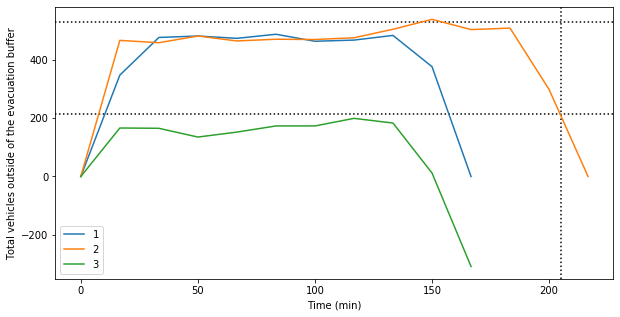

In [2]:
random_seed = 0
rerouting_pct = 0
contraflow = 0

fig, ax = plt.subplots(1,1, figsize=(10, 5))
for phase_tdiff in [0]:
    ax.axhline(530, ls=':', c='k')
    ax.axhline(215, ls=':', c='k')
    ax.axvline(205, ls=':', c='k')
    t_stats = pd.read_csv('projects/butte/simulation_outputs/t_stats/t_stats_rs{}_r{}_pt{}_cf{}_123.csv'.format(random_seed, rerouting_pct, phase_tdiff, contraflow))
    ax.plot(t_stats['t']/60, t_stats['into_21806']-t_stats['into_11321'], label=1)

    t_stats_2 = pd.read_csv('projects/butte/simulation_outputs/t_stats/t_stats_rs{}_r{}_pt{}_cf{}_45678.csv'.format(random_seed, rerouting_pct, phase_tdiff, contraflow))
    ax.plot(t_stats_2['t']/60, t_stats_2['into_21806']-t_stats_2['into_11321'], label=2)
    # ax.plot(t_stats_2['t']/60, t_stats_2['into_21806'], label='21806-2')
    # ax.plot(t_stats_2['t']/60, t_stats_2['into_11321'], label='11321-2')

    t_stats_3 = pd.read_csv('projects/butte/simulation_outputs/t_stats/t_stats_rs{}_r{}_pt{}_cf{}_9-14.csv'.format(random_seed, rerouting_pct, phase_tdiff, contraflow))
    ax.plot(t_stats_3['t']/60, t_stats_3['into_21806']-t_stats_3['into_11321'], label=3)
    # ax.plot(t_stats_3['t']/60, t_stats_3['into_21806'], label='21806-3')
    # ax.plot(t_stats_3['t']/60, t_stats_3['into_11321'], label='11321-3')

plt.xlabel('Time (min)')
plt.ylabel('Total vehicles outside of the evacuation buffer')
plt.legend()
plt.show()

In [30]:
od = pd.read_csv('projects/butte/demand_inputs/od_InFO.csv')
od.head()

od = od.loc[od['evac_zone']<=14]
od['dept_time_scen_1'] = 0
od['dept_time_scen_2'] = np.where(
    od['evac_zone'].isin([1,2,3]), 0, np.where(
        od['evac_zone'].isin([4,5,6,7,8]), 157*60, np.where(
            od['evac_zone'].isin([9,10,11,12,13,14]), (157+205)*60, 0
    )))
od.groupby('evac_zone').agg({'dept_time_scen_2': np.mean})

od.to_csv('projects/butte/demand_inputs/od_InFO_3phase.csv', index=False)

In [4]:
### OSMnx
edges = pd.read_csv('projects/butte_osmnx/network_inputs/butte_edges_sim.csv')

scen_nm = 'rs0_dt1_r0_pt0_cf0'
for t in range(1000, 3000, 1000):
    link_stats_t = pd.read_csv('projects/butte_osmnx/simulation_outputs/link_stats/link_stats_{}_t{}.csv'.format(scen_nm, t))
    link_stats_t = link_stats_t.merge(edges[['eid', 'length', 'lanes', 'geometry']], how='left', left_on='link_id', right_on='eid')
    link_stats_t['q_r_density'] = (link_stats_t['q'] + link_stats_t['r'])/(link_stats_t['length']*link_stats_t['lanes'])
    link_stats_t.to_csv('projects/butte_osmnx/visualization_outputs/link_stats_geom/link_stats_{}_t{}.csv'.format(scen_nm, t), index=False)